In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/CMPE 442/online_shoppers_intention.csv'

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd

data = pd.read_csv(file_path)

data.head()


Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
missing = data.isnull().sum()
missing

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

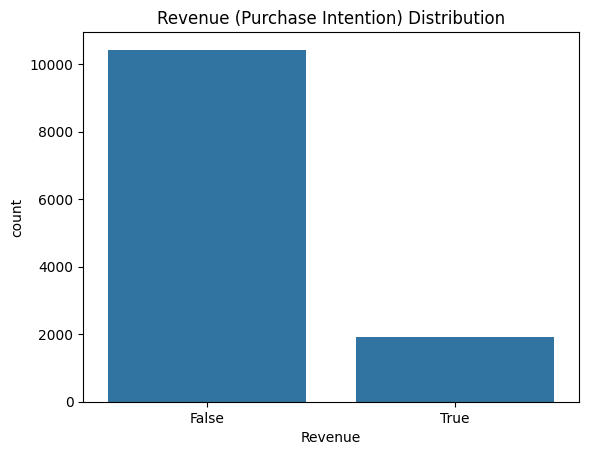

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='Revenue', data=data)
plt.title("Revenue (Purchase Intention) Distribution")
plt.show()

print(data['Revenue'].value_counts(normalize=True))


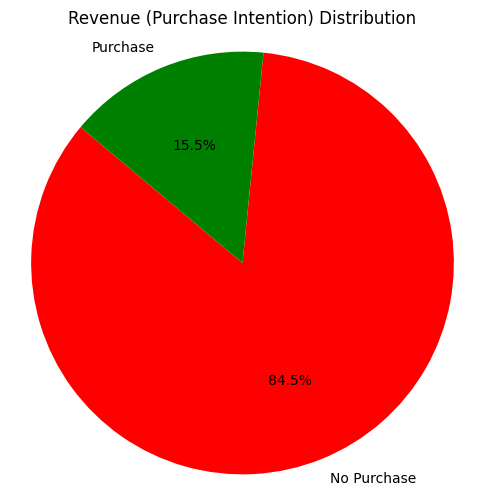

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

revenue_counts = data['Revenue'].value_counts()
labels = ['No Purchase', 'Purchase']
colors = ['Red', 'green']
explode = (0.05, 0.1)

plt.figure(figsize=(6,6))
plt.pie(revenue_counts, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors)
plt.title('Revenue (Purchase Intention) Distribution')
plt.axis('equal')
plt.show()

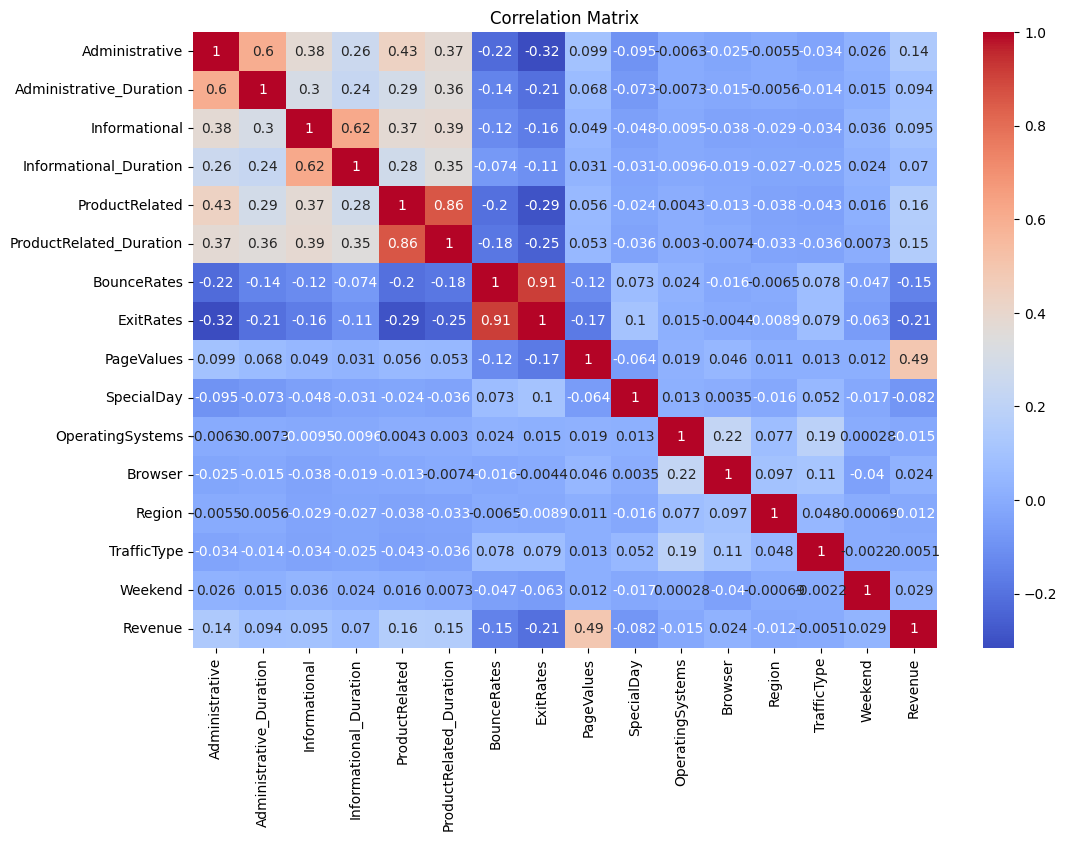

In [ ]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# one hot encoding for month feature (adds 11 new feature)
data = pd.get_dummies(data, columns=['Month'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  VisitorType           

In [ ]:
# visitor type (label encoding)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  VisitorType           

In [ ]:
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  VisitorType           

In [ ]:
# rebalance
X = data.drop('Revenue', axis=1)
y = data['Revenue']

print(y.value_counts(normalize=True))


Revenue
0    0.845255
1    0.154745
Name: proportion, dtype: float64


In [ ]:
major = data[y == 0]
minor = data[y == 1]

In [ ]:

from sklearn.utils import resample

major_downsampled = resample(major,
                             replace=False,
                             n_samples=len(major),
                             random_state=42)

minor_upsampled = resample(minor,
                           replace=True,
                           n_samples=len(major),
                           random_state=42)

balanced_data = pd.concat([major, minor_upsampled])

X = balanced_data.drop('Revenue', axis=1)
y = balanced_data['Revenue']

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(n_estimators=100, random_state=42)

selector = RFE(estimator=estimator, n_features_to_select=10, step=1)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


25 25
=== Rank ===
Administrative                : Rank 1
Administrative_Duration       : Rank 1
Informational                 : Rank 5
Informational_Duration        : Rank 2
ProductRelated                : Rank 1
ProductRelated_Duration       : Rank 1
BounceRates                   : Rank 1
ExitRates                     : Rank 1
PageValues                    : Rank 1
SpecialDay                    : Rank 12
OperatingSystems              : Rank 4
Browser                       : Rank 3
Region                        : Rank 1
TrafficType                   : Rank 1
VisitorType                   : Rank 7
Weekend                       : Rank 8
Month_Dec                     : Rank 10
Month_Feb                     : Rank 16
Month_Jul                     : Rank 14
Month_June                    : Rank 15
Month_Mar                     : Rank 9
Month_May                     : Rank 6
Month_Nov                     : Rank 1
Month_Oct                     : Rank 13
Month_Sep                     : Rank 11

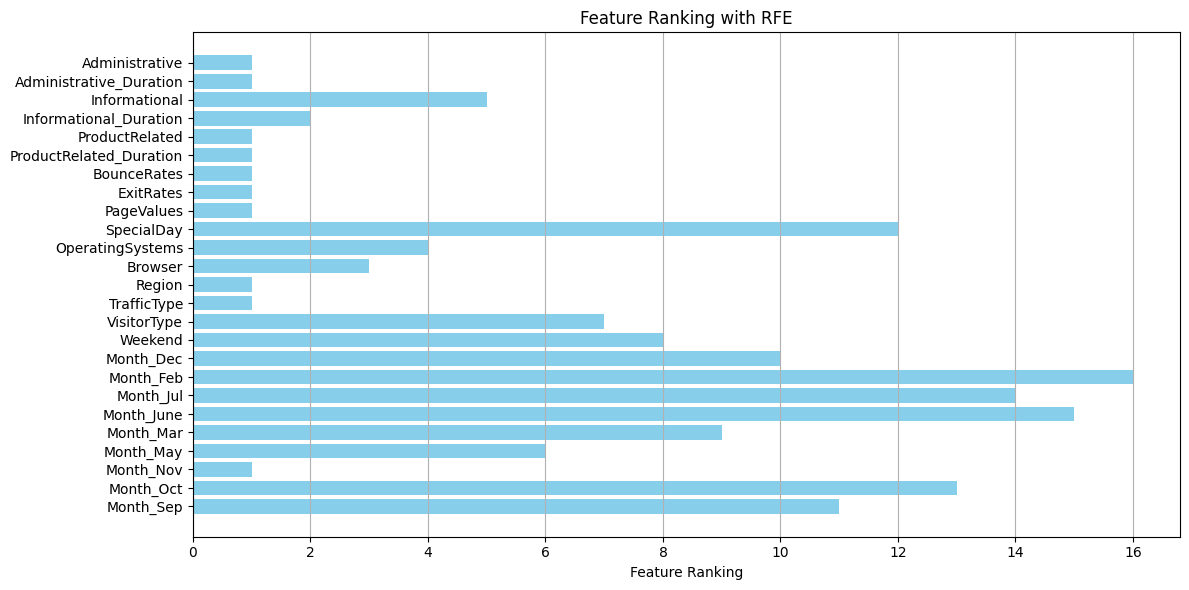

In [ ]:
feature_names = [
    'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
    'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region',
    'TrafficType', 'VisitorType', 'Weekend', 'Month_Dec', 'Month_Feb',
    'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
    'Month_Sep'
]


ranks = selector.ranking_

print(len(feature_names), len(ranks))

print("=== Rank ===")
for name, rank in zip(feature_names, selector.ranking_):
    print(f"{name:30}: Rank {rank}")

selected_feature_names = [feature_names[i] for i in selector.get_support(indices=True)]
print("\n=== Choosen 10 Features ===")
for f in selected_feature_names:
    print(f"- {f}")

ranks = selector.ranking_

plt.figure(figsize=(12, 6))
plt.barh(feature_names, ranks, color='skyblue')
plt.xlabel('Feature Ranking')
plt.title('Feature Ranking with RFE')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

X_train_df = pd.DataFrame(X_train, columns=X.columns)

importance = rf.feature_importances_
features = X_train_df.columns

feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


                    Feature  Importance
8                PageValues    0.390420
7                 ExitRates    0.096856
5   ProductRelated_Duration    0.085446
4            ProductRelated    0.072015
6               BounceRates    0.051527
1   Administrative_Duration    0.048890
0            Administrative    0.036109
22                Month_Nov    0.031862
13              TrafficType    0.028606
12                   Region    0.025128
3    Informational_Duration    0.021197
11                  Browser    0.015951
10         OperatingSystems    0.015399
2             Informational    0.014513
21                Month_May    0.012126
14              VisitorType    0.011430
15                  Weekend    0.008497
20                Month_Mar    0.008395
16                Month_Dec    0.006065
9                SpecialDay    0.004698
23                Month_Oct    0.004508
24                Month_Sep    0.004413
18                Month_Jul    0.003767
19               Month_June    0.001831


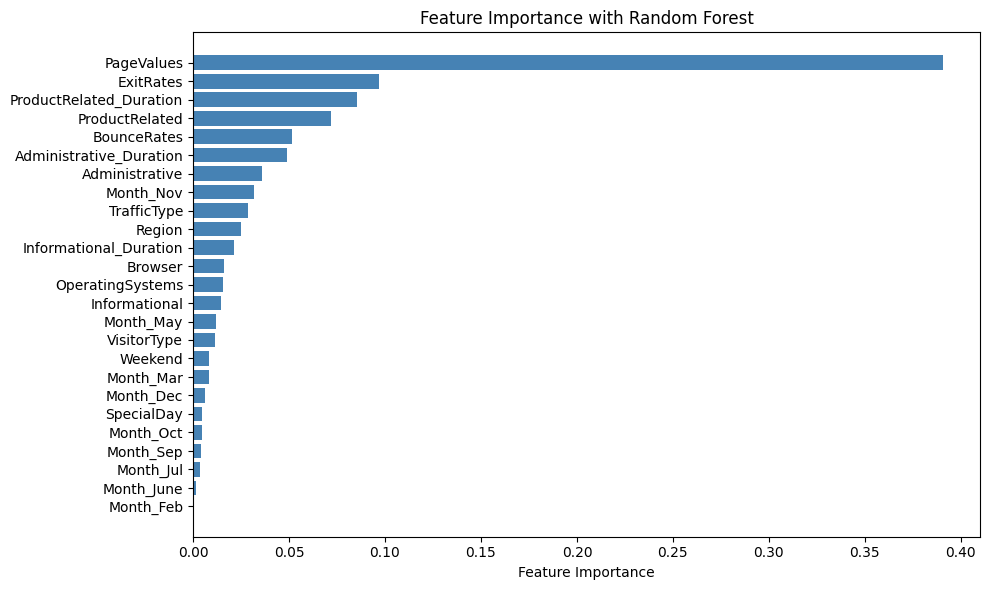

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='steelblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance with Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
#Model Selection

In [ ]:
log_model = LogisticRegression(random_state=42)

log_model.fit(X_train_selected, y_train)

y_pred = log_model.predict(X_test_selected)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      2094
           1       0.86      0.76      0.81      2075

    accuracy                           0.82      4169
   macro avg       0.82      0.82      0.82      4169
weighted avg       0.82      0.82      0.82      4169

[[1832  262]
 [ 491 1584]]


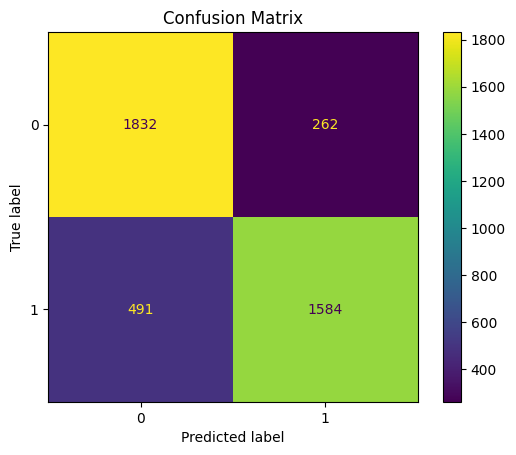

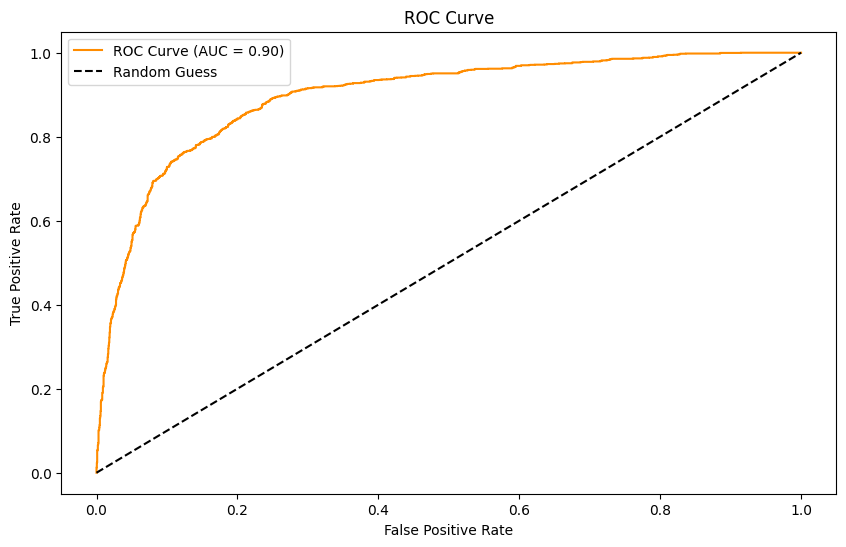

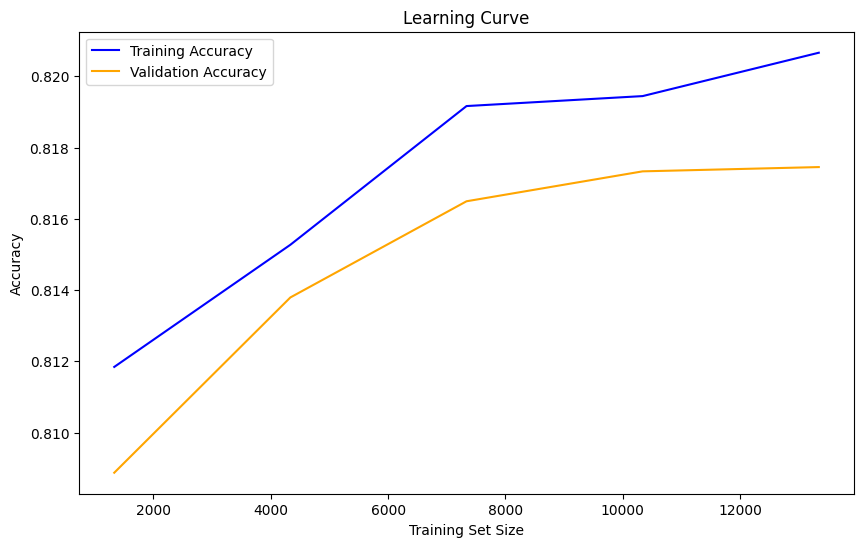

In [ ]:

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


y_proba = log_model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=log_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_model.fit(X_train_selected, y_train)


y_pred_rf = rf_model.predict(X_test_selected)


print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2094
           1       0.93      1.00      0.96      2075

    accuracy                           0.96      4169
   macro avg       0.97      0.96      0.96      4169
weighted avg       0.97      0.96      0.96      4169

[[1941  153]
 [   2 2073]]


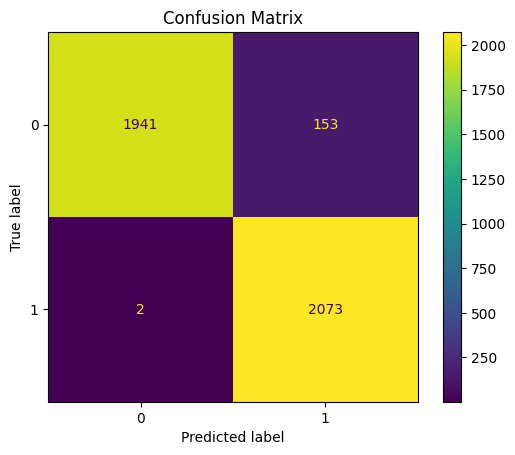

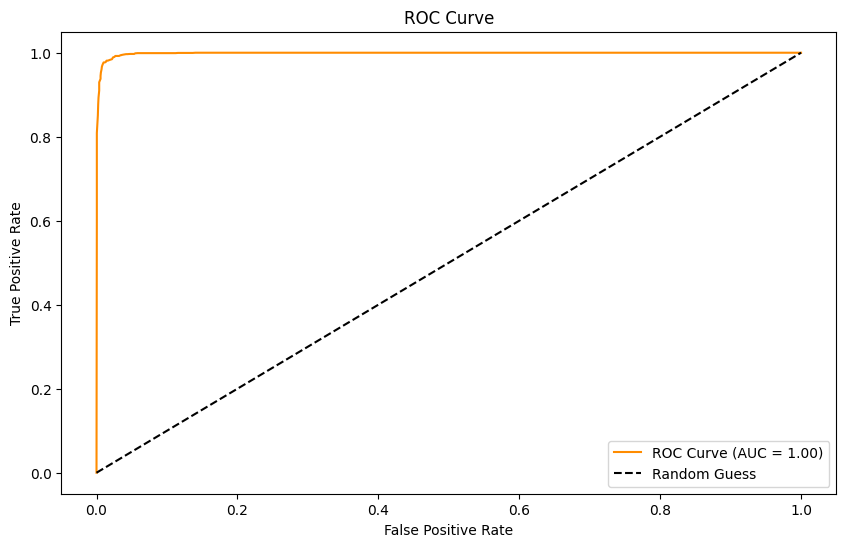

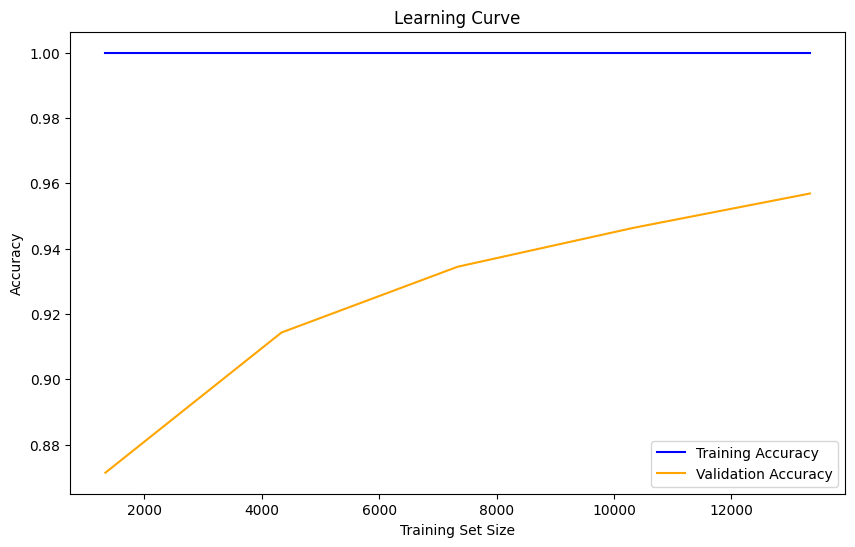

In [ ]:

cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


y_proba = rf_model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train_selected, y_train)

y_pred_xgb = xgb_model.predict(X_test_selected)

print("XGBoost Classifier Results:")
print(classification_report(y_test, y_pred_xgb, zero_division=1))
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classifier Results:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      2094
           1       0.91      0.97      0.94      2075

    accuracy                           0.94      4169
   macro avg       0.94      0.94      0.94      4169
weighted avg       0.94      0.94      0.94      4169

[[1893  201]
 [  53 2022]]


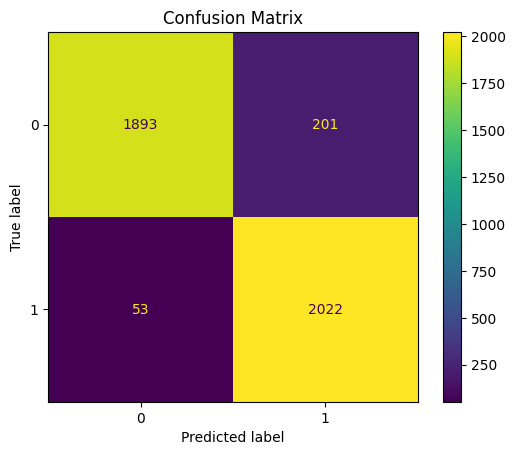

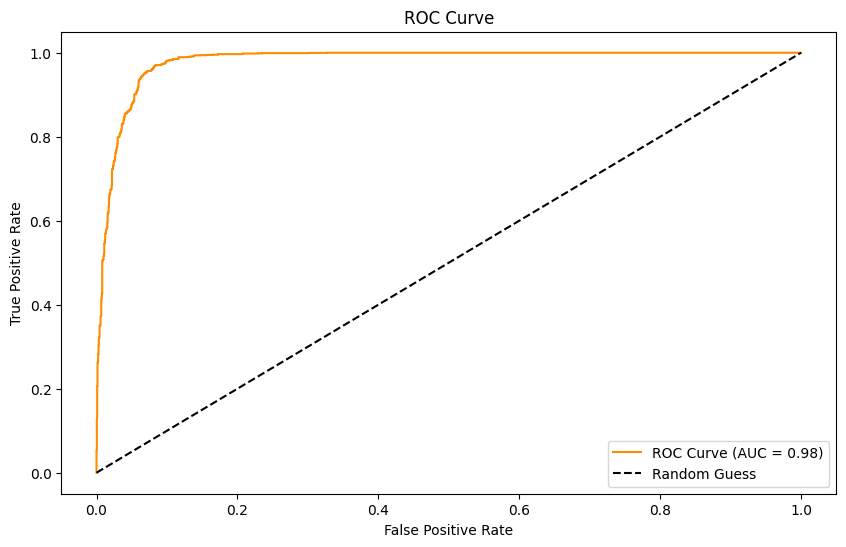

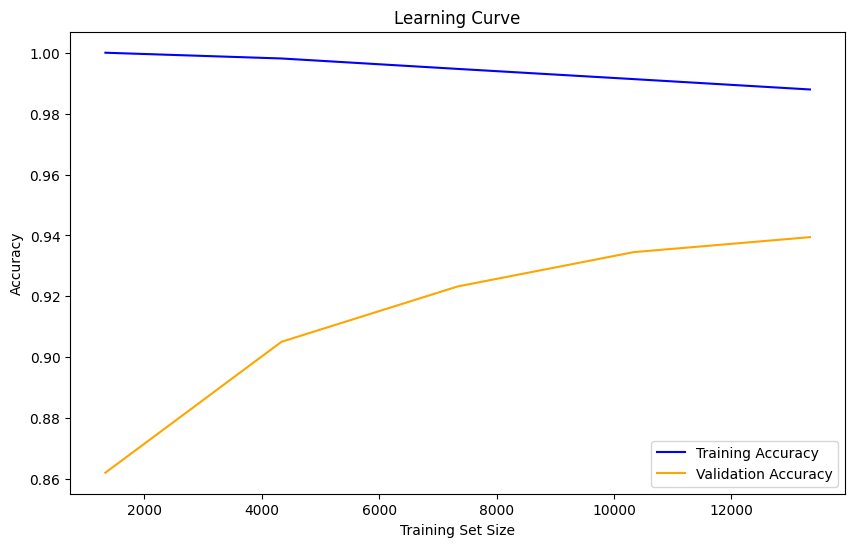

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


y_proba = xgb_model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train_selected, y_train)

y_pred_gb = gb_model.predict(X_test_selected)

print("Gradient Boosting Classifier Results:")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classifier Results:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2094
           1       0.86      0.87      0.87      2075

    accuracy                           0.87      4169
   macro avg       0.87      0.87      0.87      4169
weighted avg       0.87      0.87      0.87      4169

[[1794  300]
 [ 261 1814]]


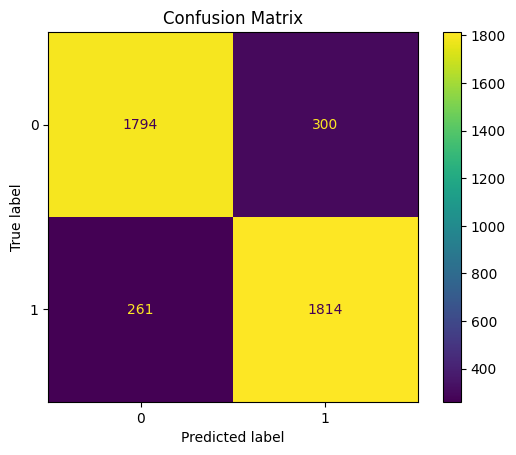

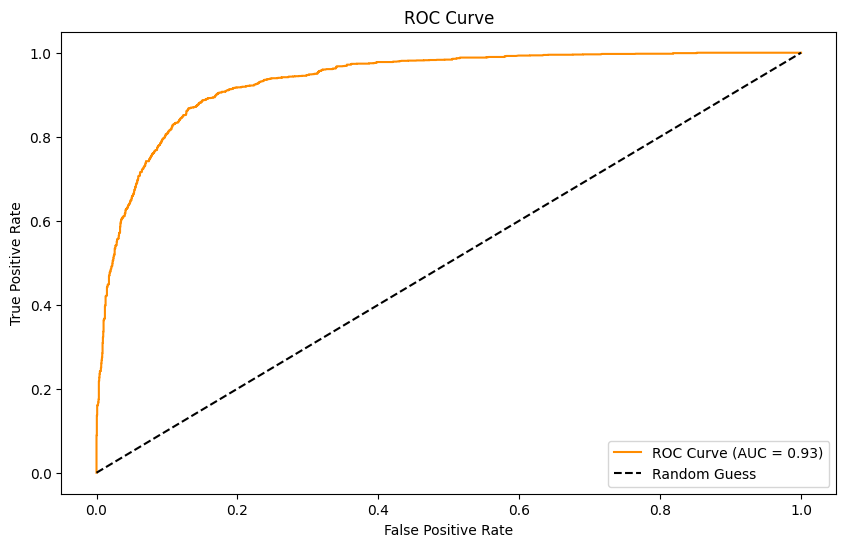

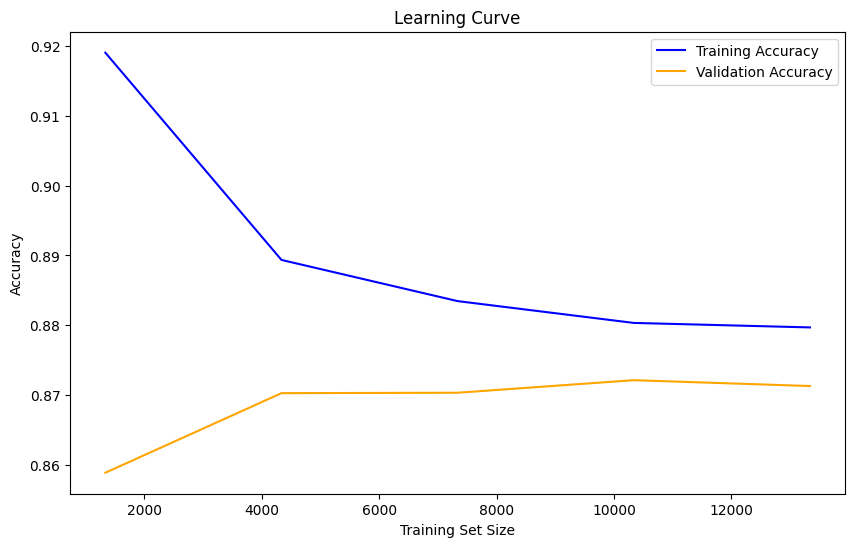

In [ ]:

cm = confusion_matrix(y_test, y_pred_gb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


y_proba = gb_model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=gb_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.5 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)

lgbm_model.fit(X_train_selected, y_train)

y_pred_lgbm = lgbm_model.predict(X_test_selected)

print("LightGBM Classifier Results:")
print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 8347, number of negative: 8328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 16675, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500570 -> initscore=0.002279
[LightGBM] [Info] Start training from score 0.002279
LightGBM Classifier Results:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2094
           1       0.88      0.93      0.91      2075

    accuracy                           0.90      4169
   macro avg       0.90      0.90      0.90      4169
weighted avg       0.90      0.90      0.90      4169

[[1833  261]
 [ 142 1933]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


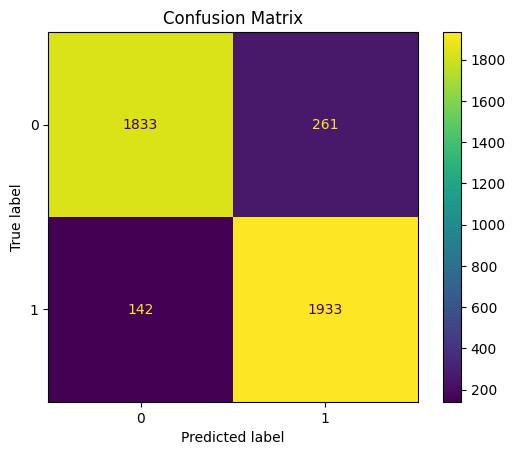

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


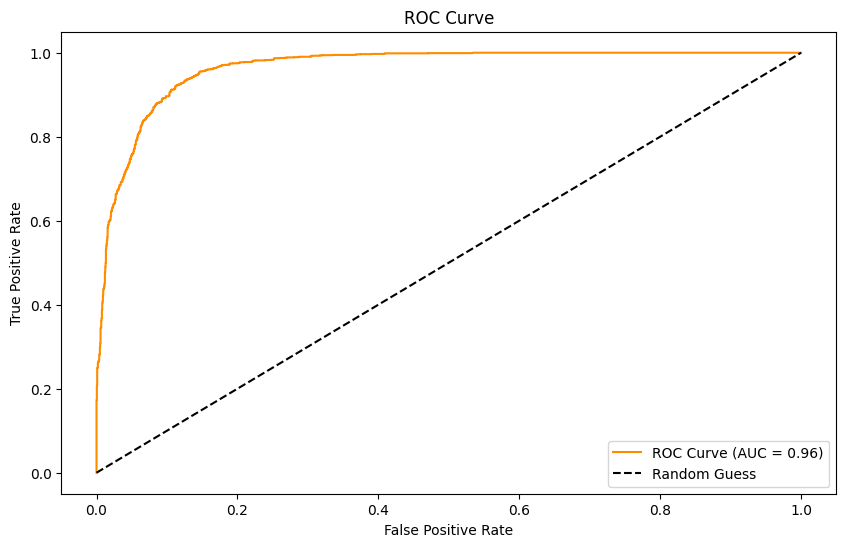

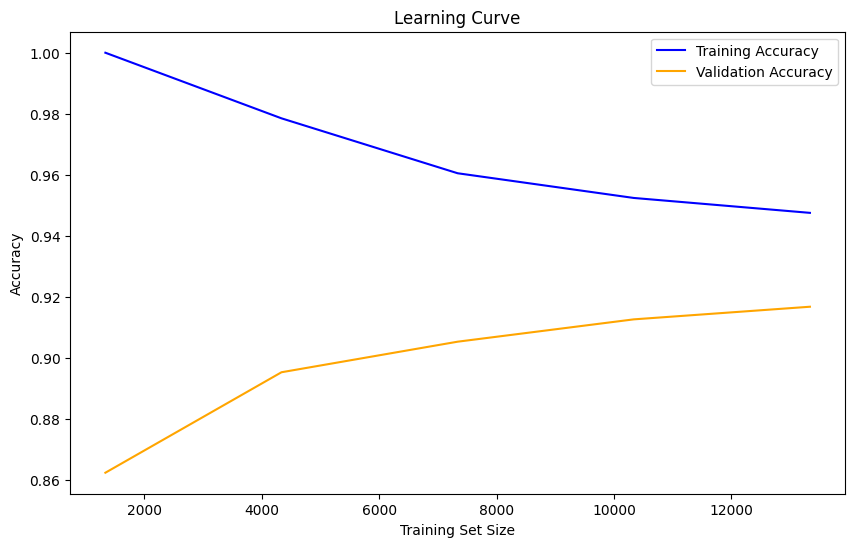

In [ ]:
cm = confusion_matrix(y_test, y_pred_lgbm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


y_proba = lgbm_model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=lgbm_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, kernel='rbf', random_state=42)
svm_model.fit(X_train_selected, y_train)
y_pred_svm = svm_model.predict(X_test_selected)
print(classification_report(y_test, y_pred_svm, zero_division=1))
print(confusion_matrix(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2094
           1       0.86      0.82      0.84      2075

    accuracy                           0.85      4169
   macro avg       0.85      0.85      0.85      4169
weighted avg       0.85      0.85      0.85      4169

[[1827  267]
 [ 373 1702]]


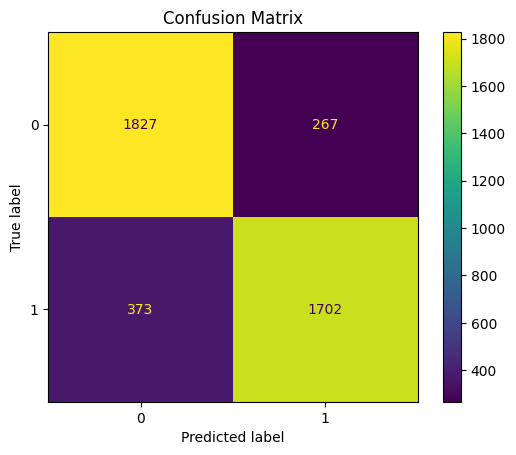

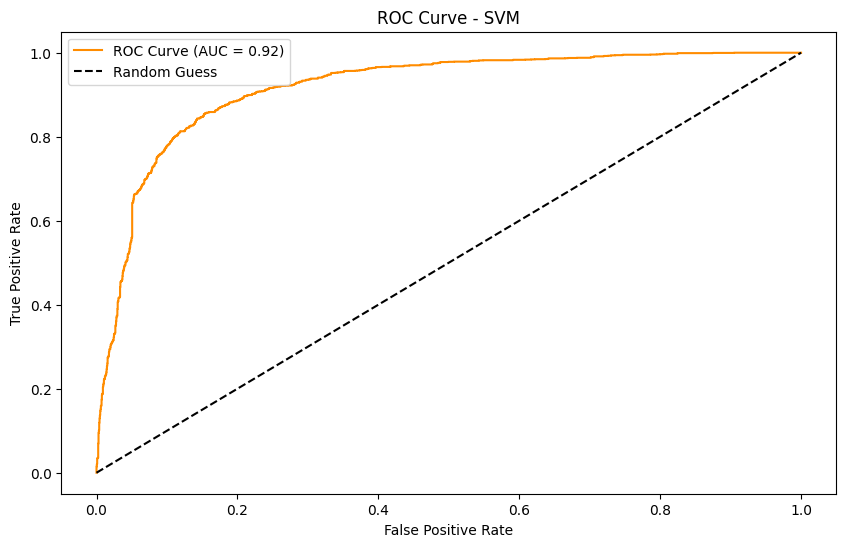

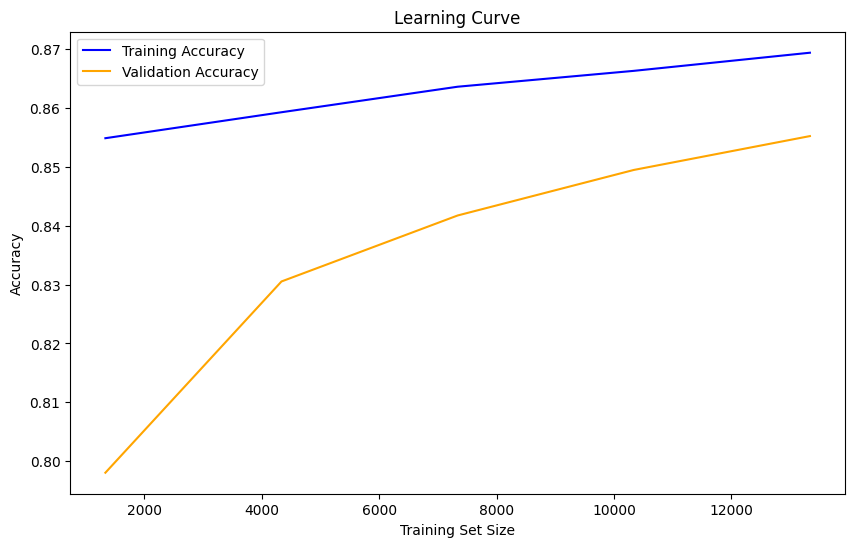

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


y_proba = svm_model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve - SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



train_sizes, train_scores, test_scores = learning_curve(
    estimator=svm_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_selected, y_train)
y_pred_knn = knn_model.predict(X_test_selected)
print(classification_report(y_test, y_pred_knn, zero_division=1))
print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      2094
           1       0.83      0.96      0.89      2075

    accuracy                           0.88      4169
   macro avg       0.89      0.88      0.88      4169
weighted avg       0.89      0.88      0.88      4169

[[1690  404]
 [  86 1989]]


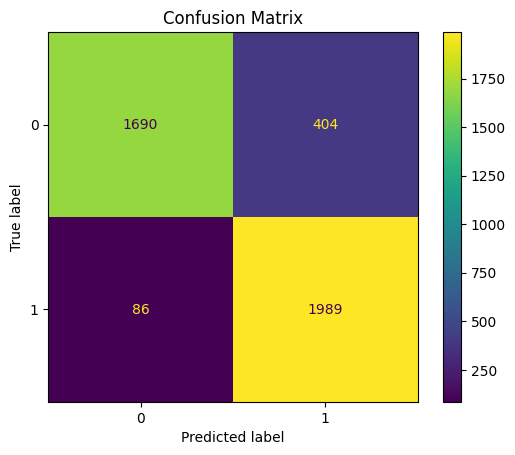

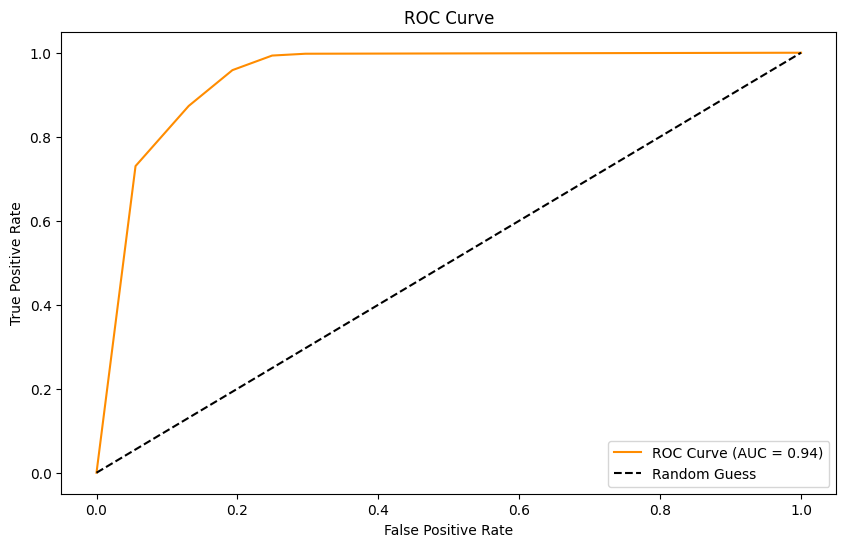

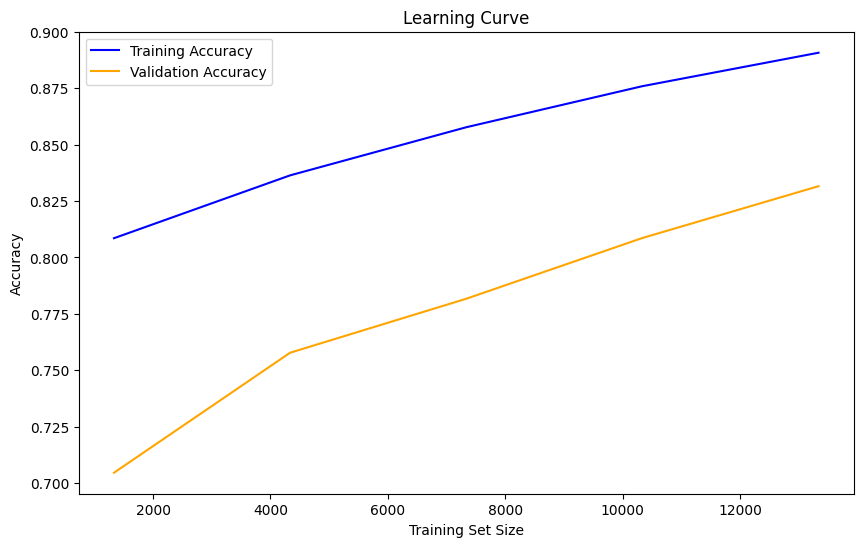

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


y_proba = knn_model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_selected, y_train)
y_pred_nb = nb_model.predict(X_test_selected)
print(classification_report(y_test, y_pred_nb, zero_division=1))
print(confusion_matrix(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.82      0.68      0.75      2094
           1       0.73      0.85      0.78      2075

    accuracy                           0.77      4169
   macro avg       0.77      0.77      0.76      4169
weighted avg       0.77      0.77      0.76      4169

[[1434  660]
 [ 317 1758]]


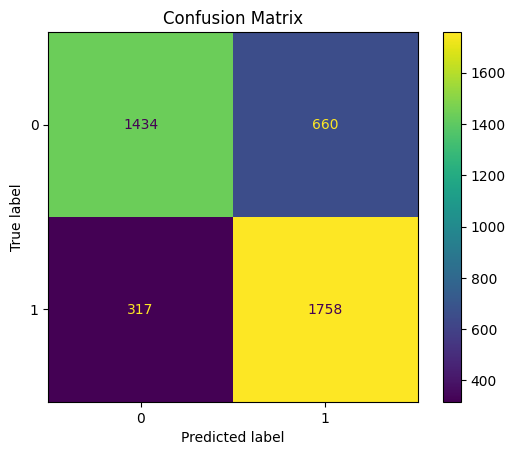

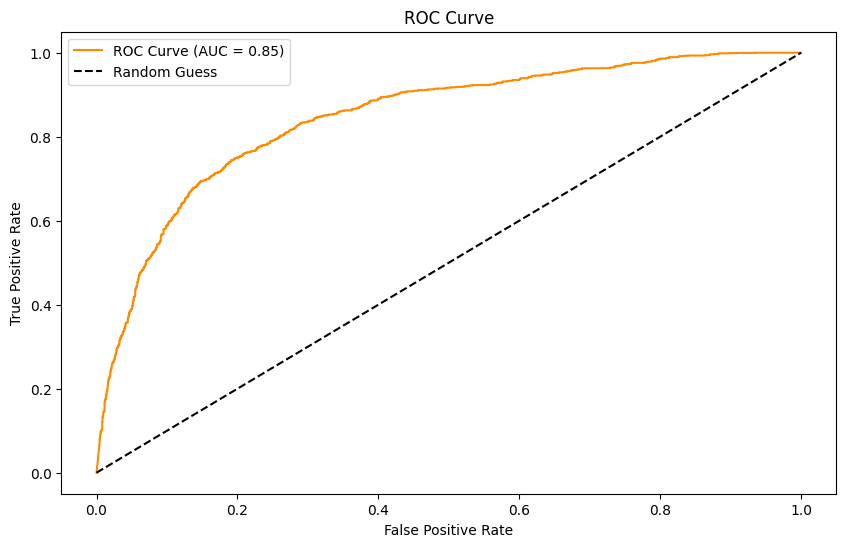

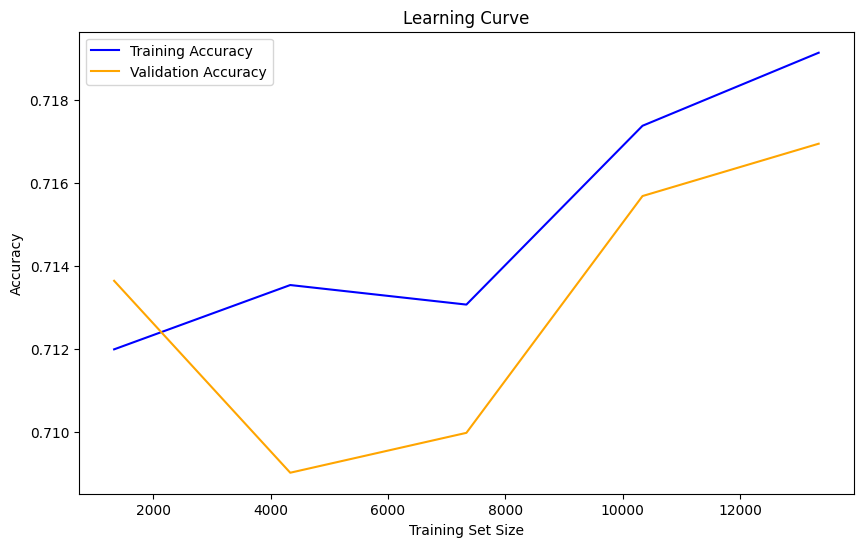

In [ ]:

cm = confusion_matrix(y_test, y_pred_nb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


y_proba = nb_model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=nb_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVM': SVC(probability=True, kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(),
    'GaussianNB': GaussianNB()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='f1')
    print(f'{name} - Mean F1 Score: {scores.mean():.4f} (+/- {scores.std():.4f})')


Logistic Regression - Mean F1 Score: 0.8071 (+/- 0.0035)
Random Forest - Mean F1 Score: 0.9557 (+/- 0.0029)
XGBoost - Mean F1 Score: 0.9370 (+/- 0.0018)
Gradient Boosting - Mean F1 Score: 0.8681 (+/- 0.0042)
[LightGBM] [Info] Number of positive: 6678, number of negative: 6662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 13340, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500600 -> initscore=0.002399
[LightGBM] [Info] Start training from score 0.002399
[LightGBM] [Info] Number of positive: 6678, number of negative: 6662
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 6678, number of negative: 6662
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 13340, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500600 -> initscore=0.002399
[LightGBM] [Info] Start training from score 0.002399
[LightGBM] [Info] Number of positive: 6677, number of negative: 6663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 13340, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500525 -> initscore=0.002099
[LightGBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 6677, number of negative: 6663
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1565
[LightGBM] [Info] Number of data points in the train set: 13340, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500525 -> initscore=0.002099
[LightGBM] [Info] Start training from score 0.002099
LightGBM - Mean F1 Score: 0.9125 (+/- 0.0037)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


SVM - Mean F1 Score: 0.8395 (+/- 0.0039)
KNN - Mean F1 Score: 0.8712 (+/- 0.0034)
GaussianNB - Mean F1 Score: 0.7890 (+/- 0.0037)


In [ ]:
# HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train_selected, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test_selected)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best F1 Score: 0.9662256078665651

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2094
           1       0.95      1.00      0.97      2075

    accuracy                           0.97      4169
   macro avg       0.97      0.97      0.97      4169
weighted avg       0.98      0.97      0.97      4169


Confusion Matrix:
[[1987  107]
 [   2 2073]]


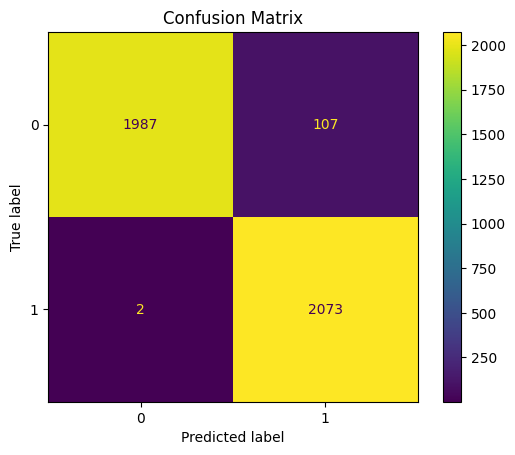

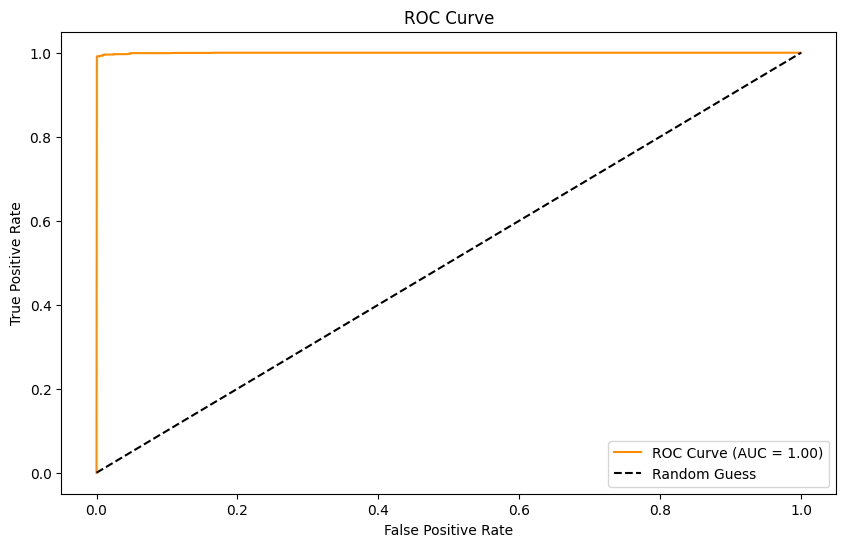

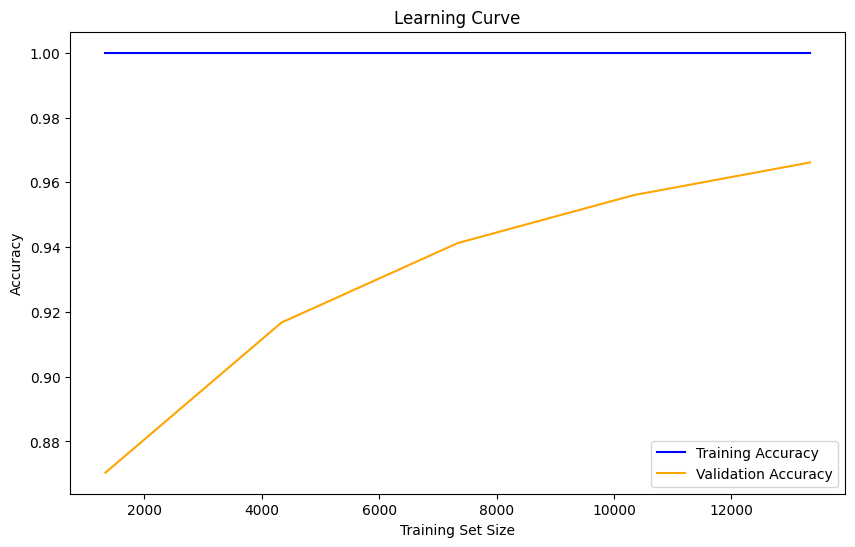

In [ ]:

cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


y_proba = best_rf_model.predict_proba(X_test_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_rf_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Some Methods XAI

In [ ]:
!pip install shap lime pdpbox

import shap
import lime
import lime.lime_tabular
from pdpbox import pdp
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 121.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.3/119.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 6.2 MB/s eta 0:0

In [ ]:
#LIME
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_selected,
    feature_names=selected_feature_names,
    class_names=['No', 'Yes'],
    mode='classification'
)

i = 0
lime_exp = lime_explainer.explain_instance(
    X_test_selected[i],
    best_rf_model.predict_proba,
    num_features=10
)

lime_exp.show_in_notebook(show_table=True)


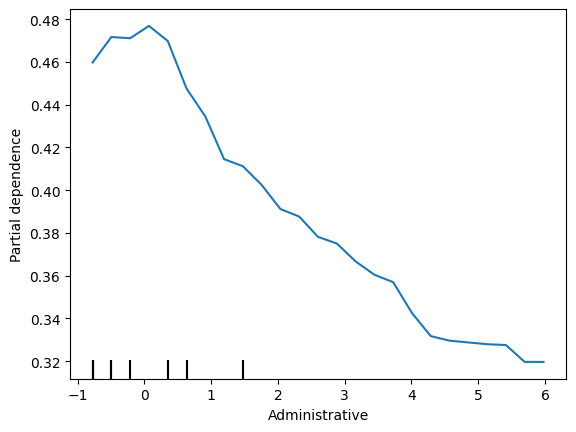

In [ ]:
#PDP
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

feature_index = 0

PartialDependenceDisplay.from_estimator(
    estimator=best_rf_model,
    X=X_test_selected,
    features=[feature_index],
    feature_names=selected_feature_names
)
plt.show()


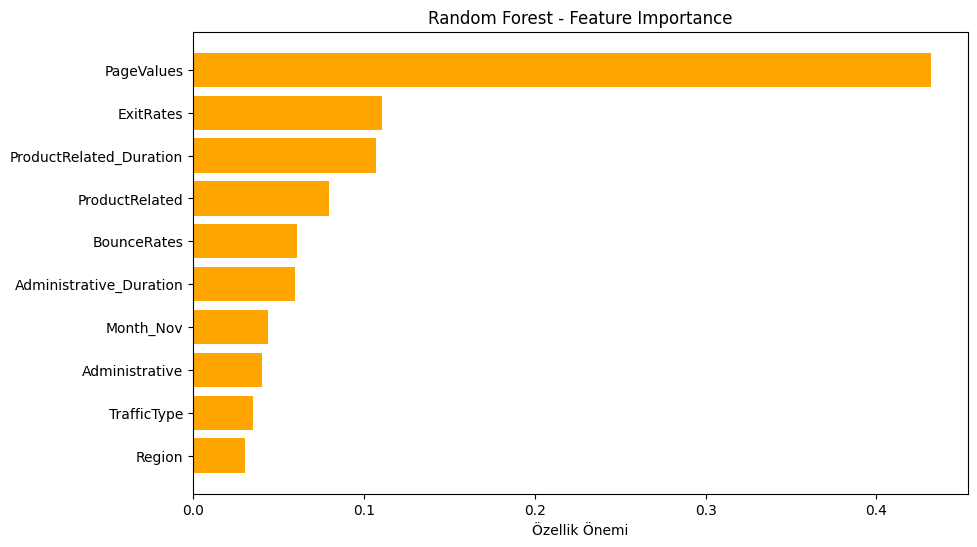

In [ ]:
#Feature Importance
importances = best_rf_model.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='orange')
plt.xlabel('Özellik Önemi')
plt.title('Random Forest - Feature Importance')
plt.gca().invert_yaxis()
plt.show()


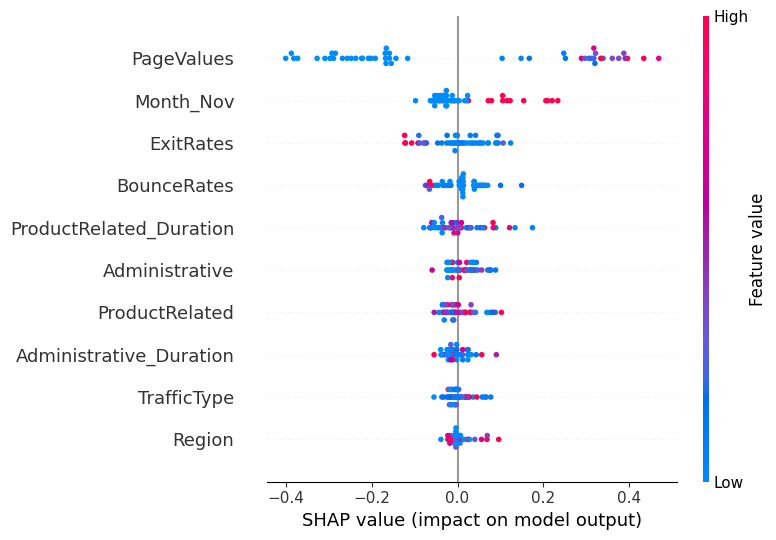

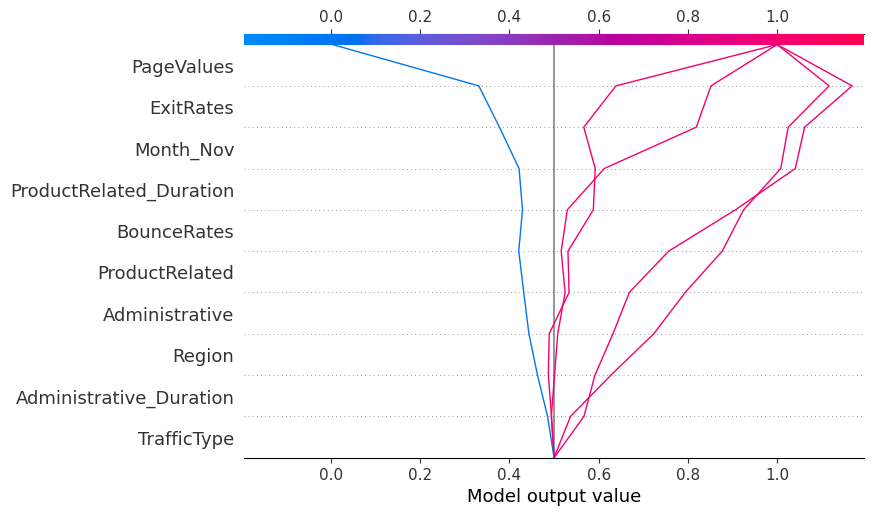

In [ ]:
#SHAP and Desicion Plot
import shap
import pandas as pd
import numpy as np

X_test_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)
X_sample = X_test_df.iloc[:50]

explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_sample)

class_index = 1
shap_matrix = shap_values[:50, :, class_index]
expected_val = explainer.expected_value[class_index]

shap.summary_plot(shap_matrix, X_sample)

shap.decision_plot(expected_val, shap_matrix[:5], feature_names=selected_feature_names)


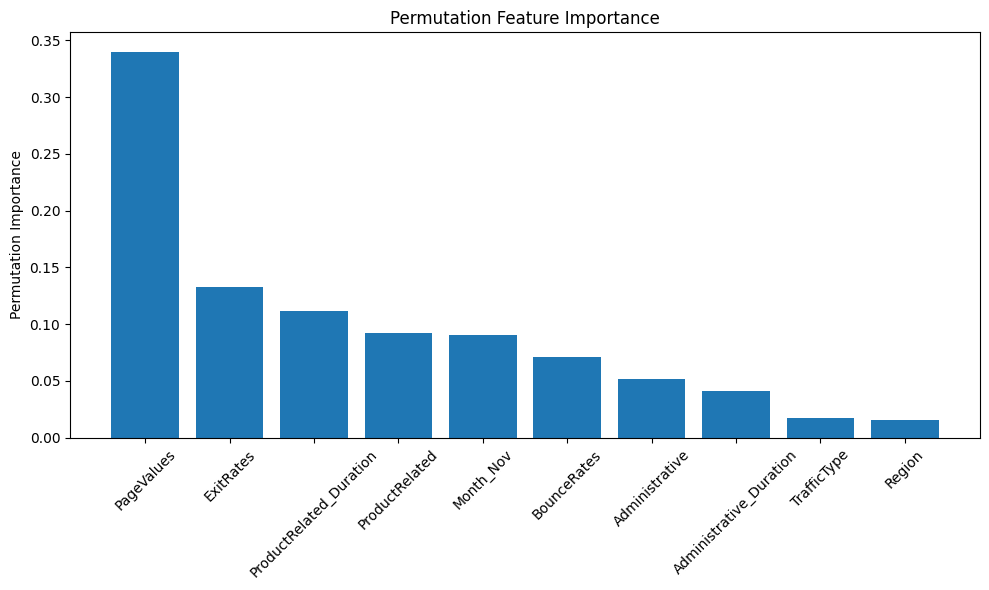

In [ ]:
#Permutation Feature Importance
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

result = permutation_importance(best_rf_model, X_test_selected, y_test, n_repeats=10, random_state=42, scoring='accuracy')

sorted_idx = result.importances_mean.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), np.array(selected_feature_names)[sorted_idx], rotation=45)
plt.ylabel("Permutation Importance")
plt.title("Permutation Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

🔹 SHAP Summary – Class 0 (Non-Buyers)


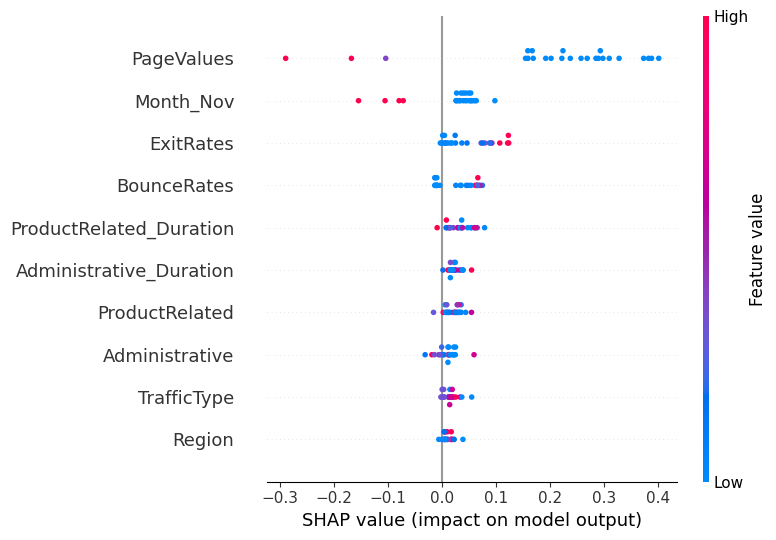

🔸 SHAP Summary – Class 1 (Buyers)


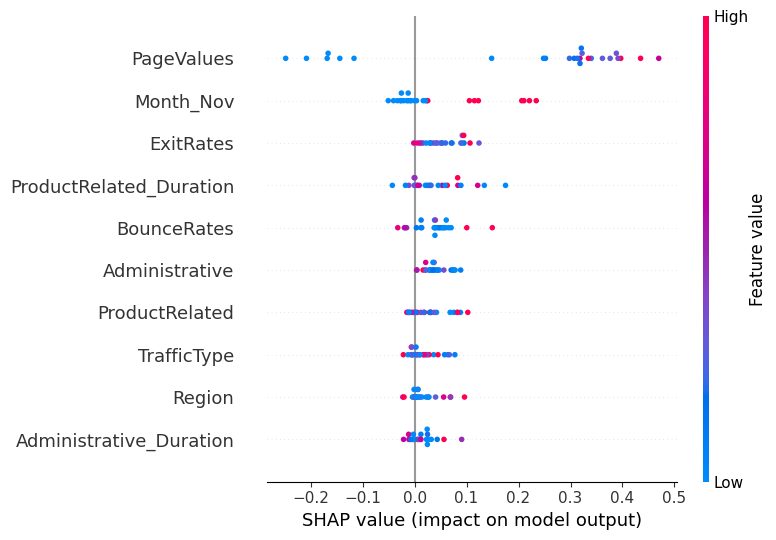

In [ ]:
import shap
import pandas as pd

X_test_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)
X_sample = X_test_df.iloc[:50]
y_sample = y_test[:50]

explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_sample)
class_0_idx = 0
class_1_idx = 1

indices_class_0 = [i for i in range(50) if y_sample.iloc[i] == class_0_idx]
indices_class_1 = [i for i in range(50) if y_sample.iloc[i] == class_1_idx]

X_class_0 = X_sample.iloc[indices_class_0]
X_class_1 = X_sample.iloc[indices_class_1]
shap_values_class_0 = shap_values[indices_class_0, :, class_0_idx]
shap_values_class_1 = shap_values[indices_class_1, :, class_1_idx]

print("🔹 SHAP Summary – Class 0 (Non-Buyers)")
shap.summary_plot(shap_values_class_0, X_class_0, max_display=10)

print("🔸 SHAP Summary – Class 1 (Buyers)")
shap.summary_plot(shap_values_class_1, X_class_1, max_display=10)




========== Subgroup: Month_Nov ==========
✅ SHAP is drawing: Month_Nov = 0 (5 örnek)


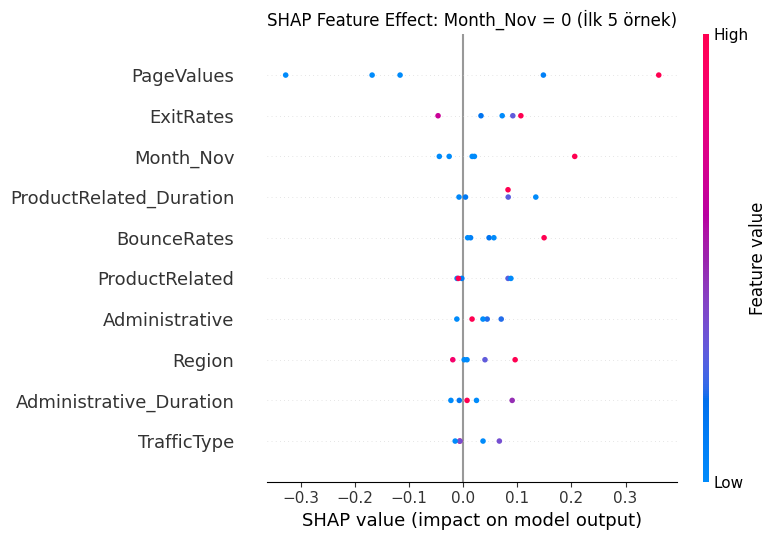


========== Subgroup: TrafficType ==========
✅ SHAP is drawing: TrafficType = 1 (5 örnek)


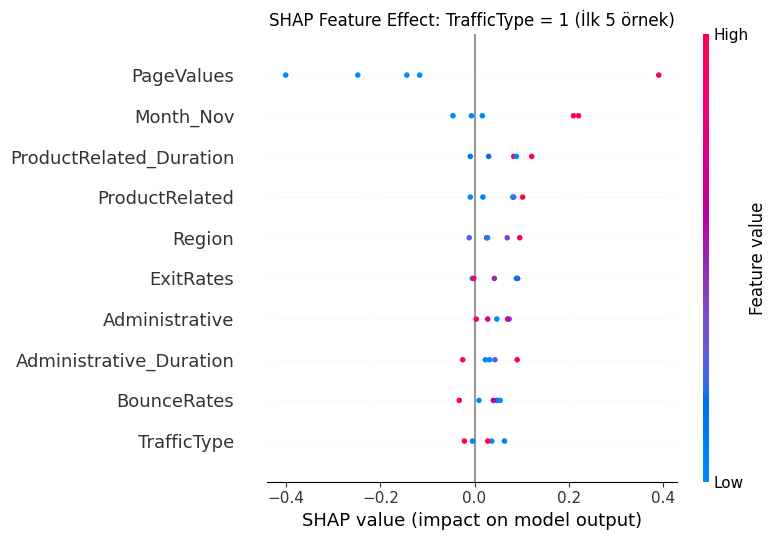

✅ SHAP is drawing: TrafficType = 2 (5 örnek)


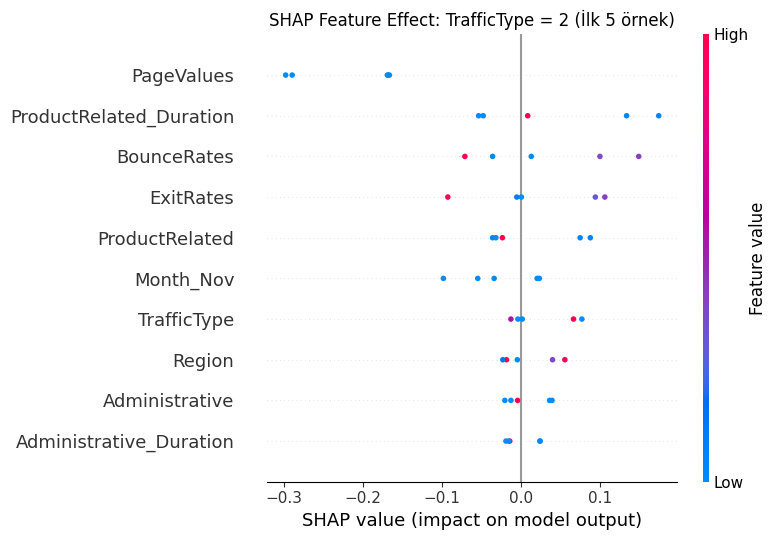

✅ SHAP is drawing: TrafficType = 3 (5 örnek)


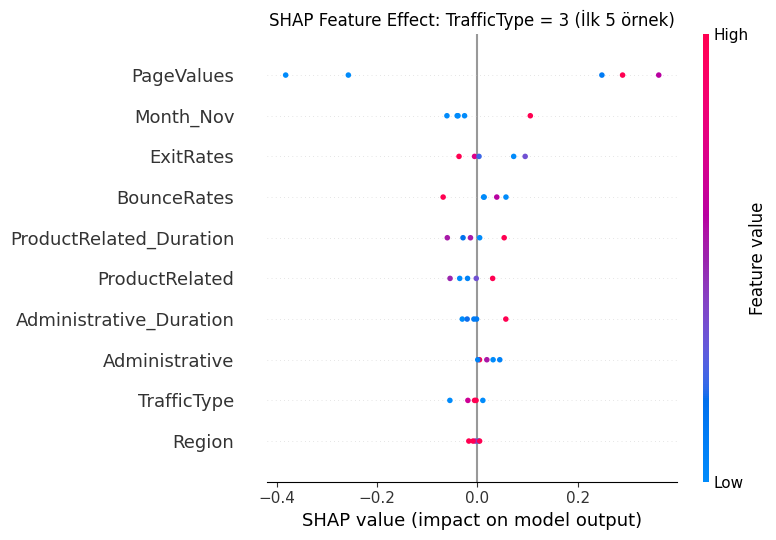

✅ SHAP is drawing: TrafficType = 4 (5 örnek)


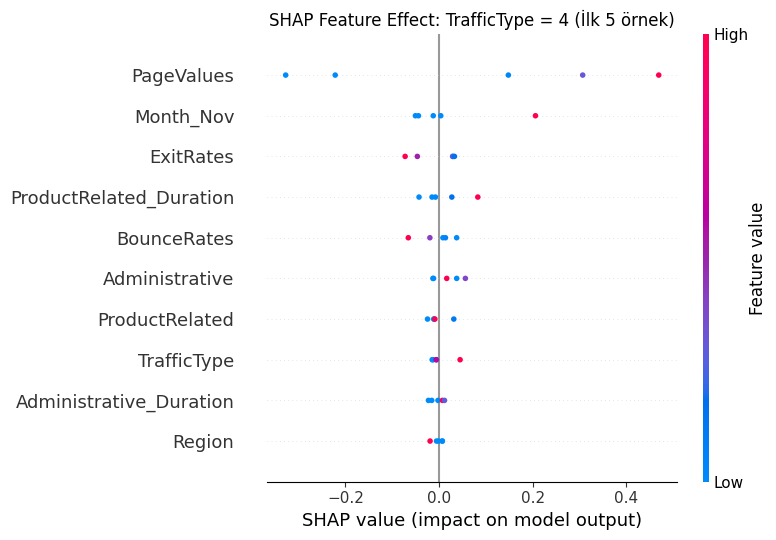

✅ SHAP is drawing: TrafficType = 5 (5 örnek)


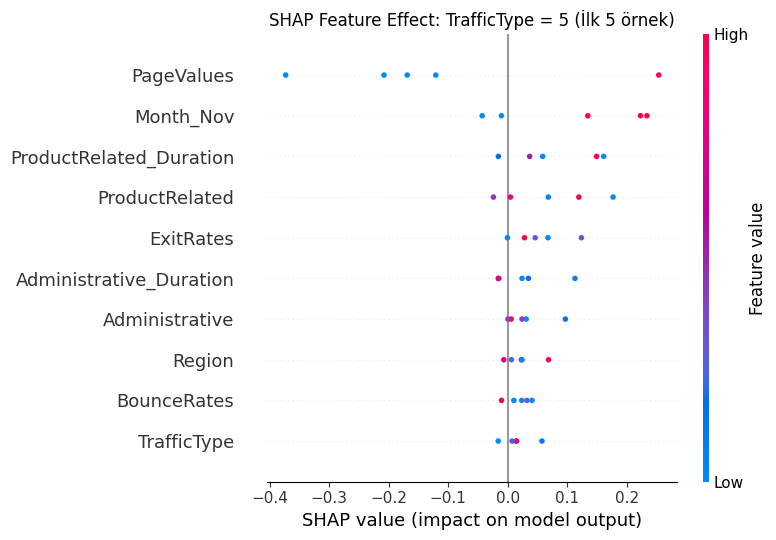

✅ SHAP is drawing: TrafficType = 6 (5 örnek)


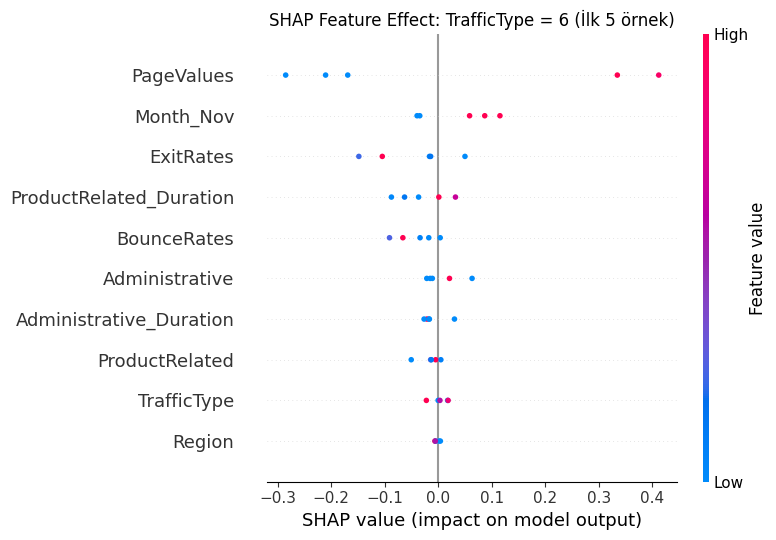

✅ SHAP is drawing: TrafficType = 7 (5 örnek)


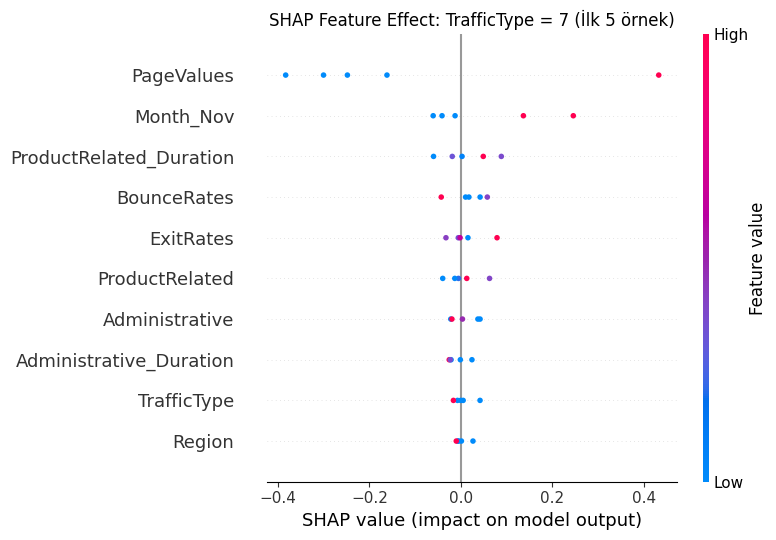

✅ SHAP is drawing: TrafficType = 8 (5 örnek)


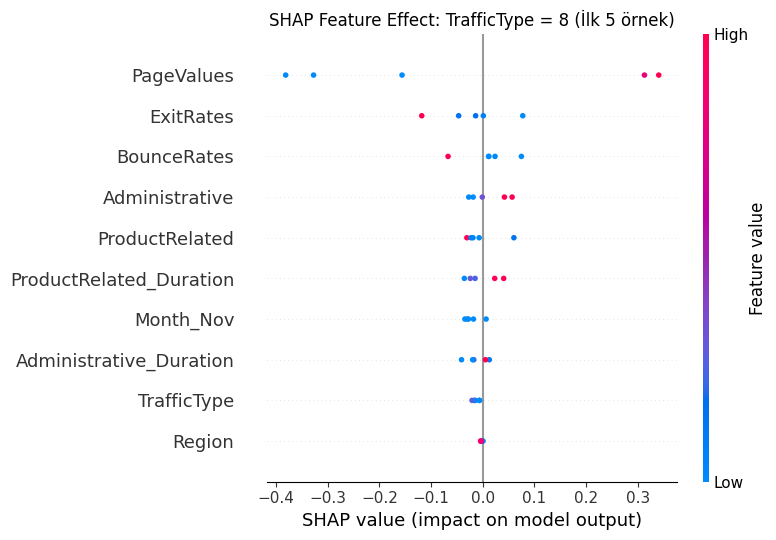

✅ SHAP is drawing: TrafficType = 9 (5 örnek)


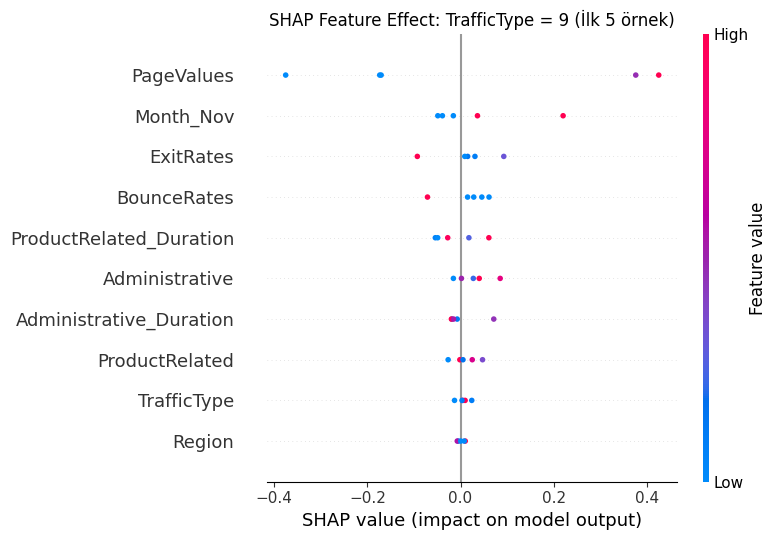

✅ SHAP is drawing: TrafficType = 10 (5 örnek)


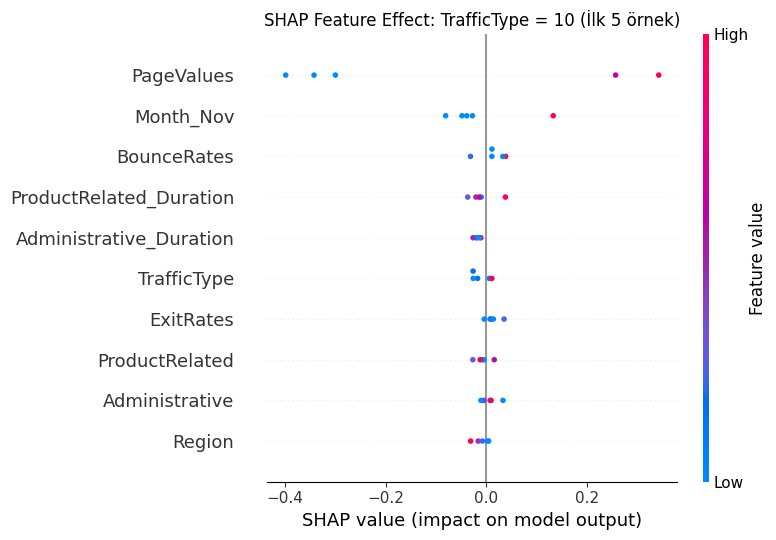

✅ SHAP is drawing: TrafficType = 11 (5 örnek)


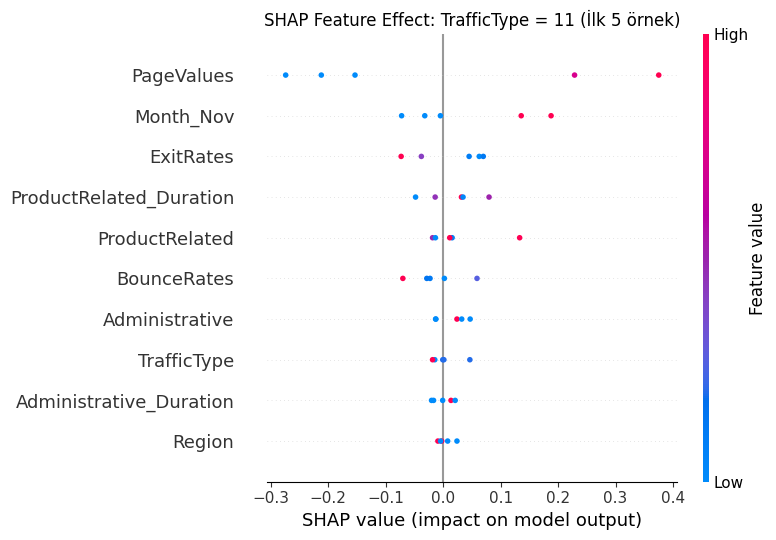

⏭️ 12 group too small, SHAP not calculated (1 example)
✅ SHAP is drawing: TrafficType = 13 (5 örnek)


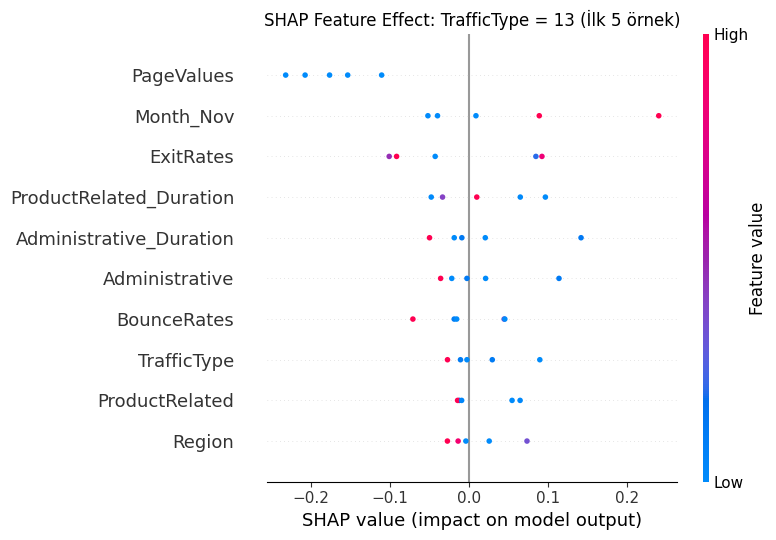

✅ SHAP is drawing: TrafficType = 14 (5 örnek)


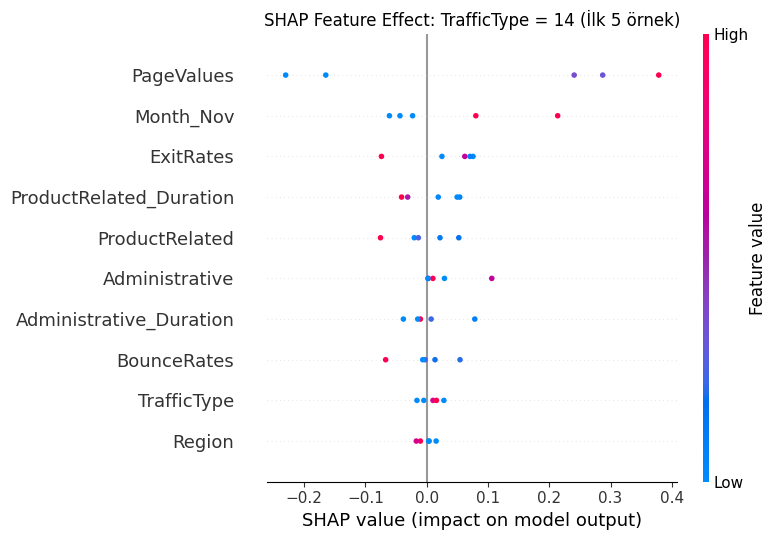

✅ SHAP is drawing: TrafficType = 15 (5 örnek)


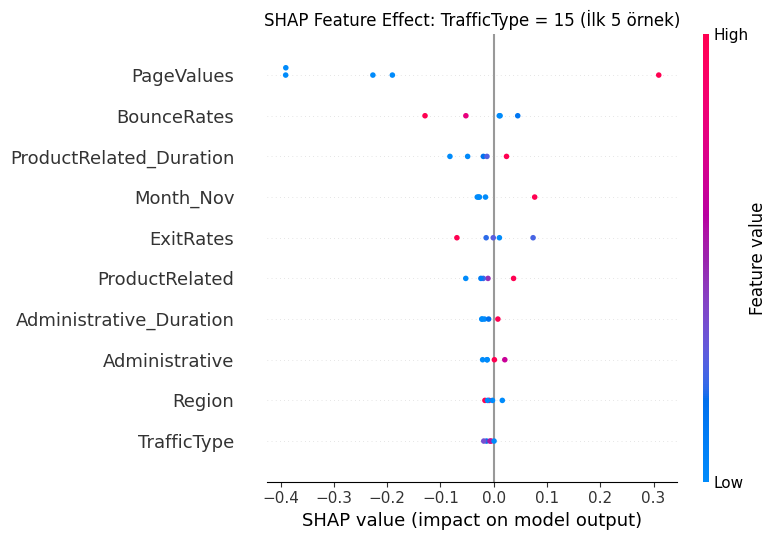

✅ SHAP is drawing: TrafficType = 18 (5 örnek)


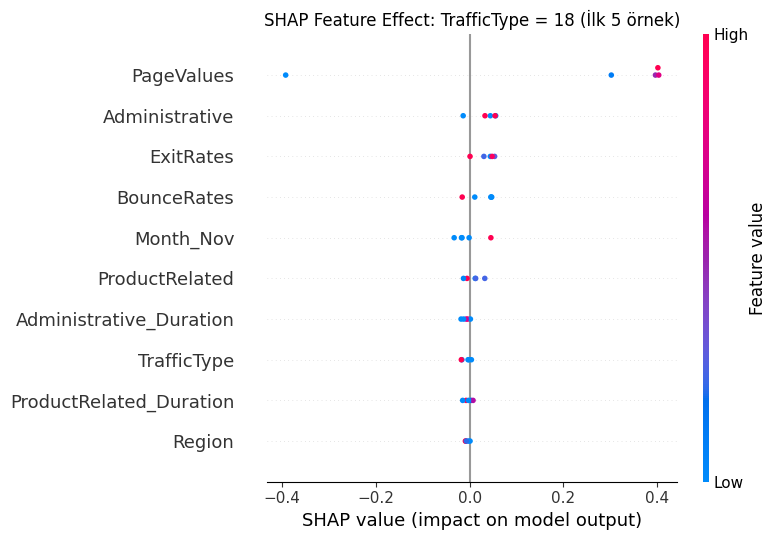

✅ SHAP is drawing: TrafficType = 19 (5 örnek)


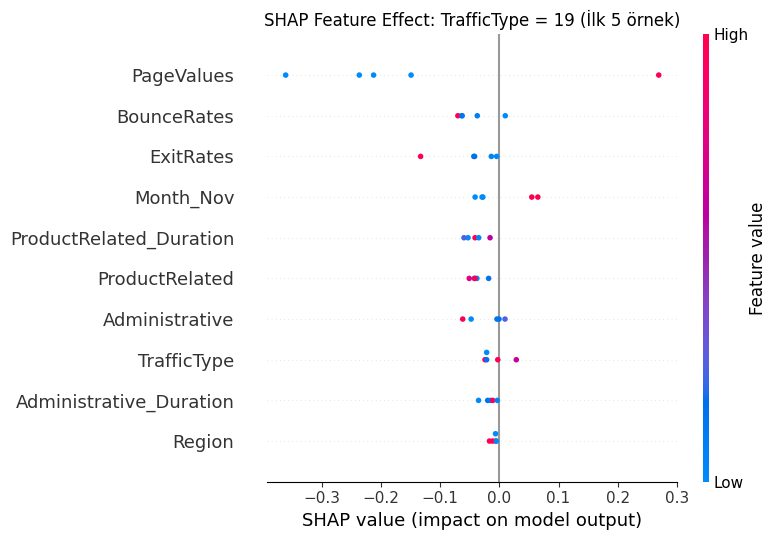

⏭️ 16 group too small, SHAP not calculated (2 example)
⏭️ 17 group too small, SHAP not calculated (1 example)
✅ SHAP is drawing: TrafficType = 20 (5 örnek)


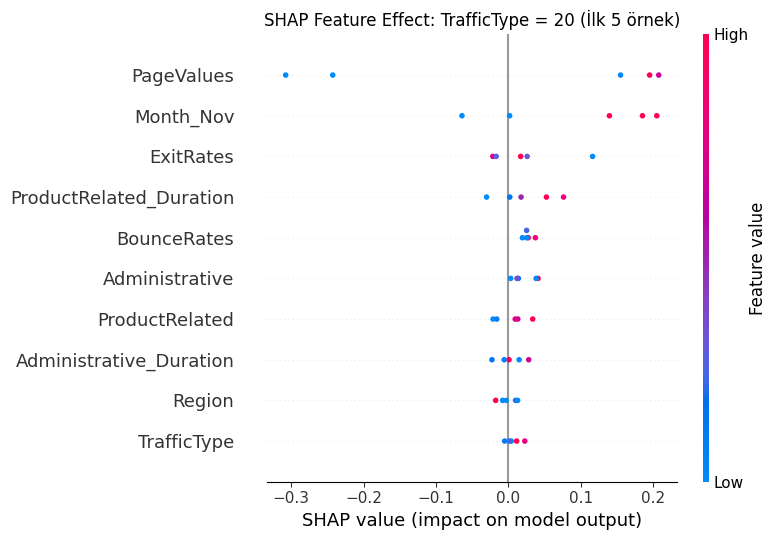


========== Subgroup: Region ==========
✅ SHAP is drawing: Region = 1 (5 örnek)


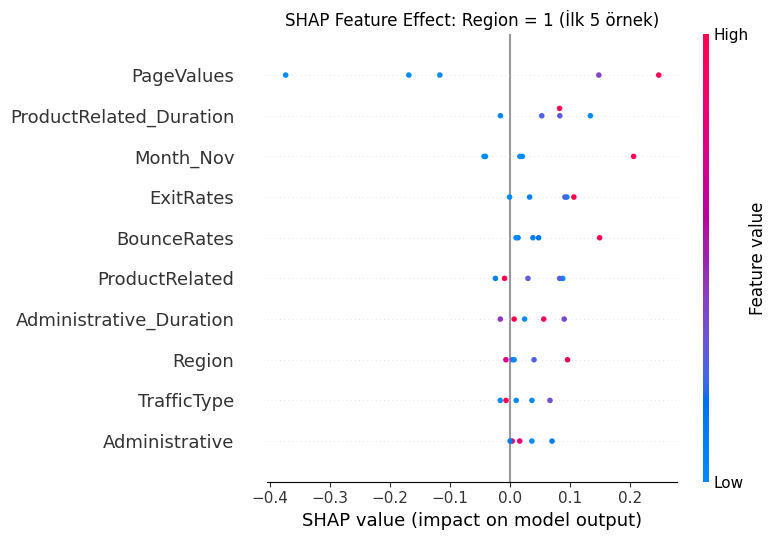

✅ SHAP is drawing: Region = 9 (5 örnek)


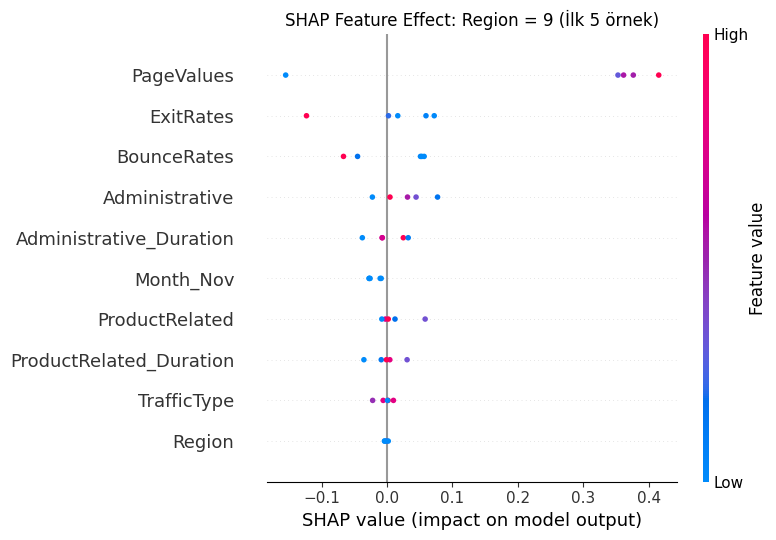

✅ SHAP is drawing: Region = 2 (5 örnek)


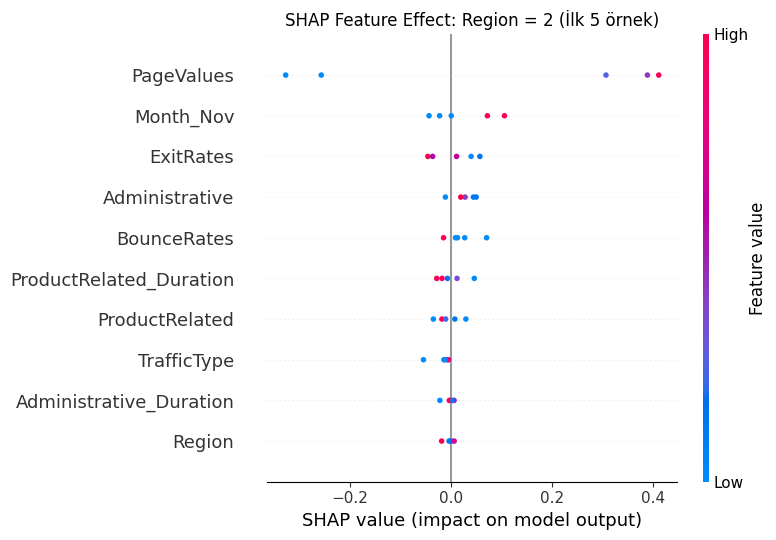

✅ SHAP is drawing: Region = 3 (5 örnek)


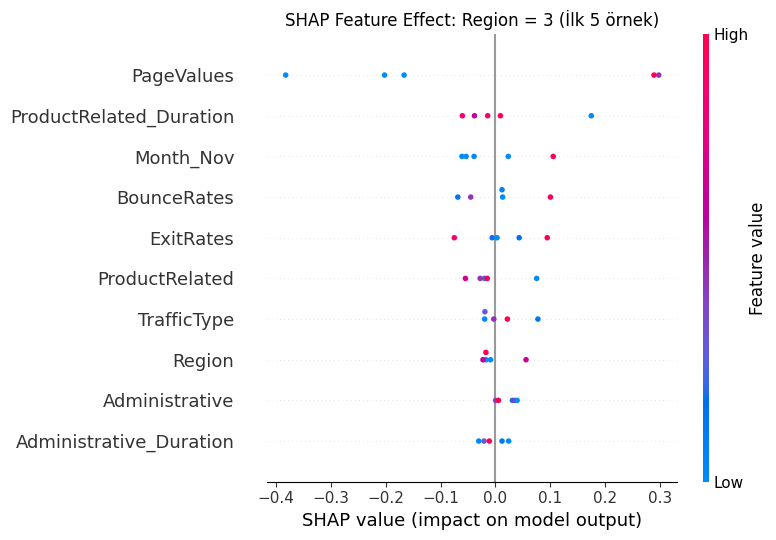

✅ SHAP is drawing: Region = 4 (5 örnek)


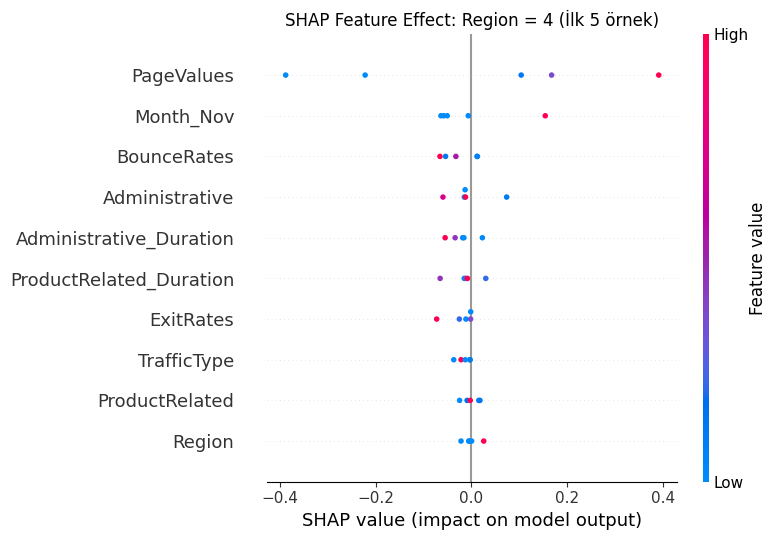

✅ SHAP is drawing: Region = 5 (5 örnek)


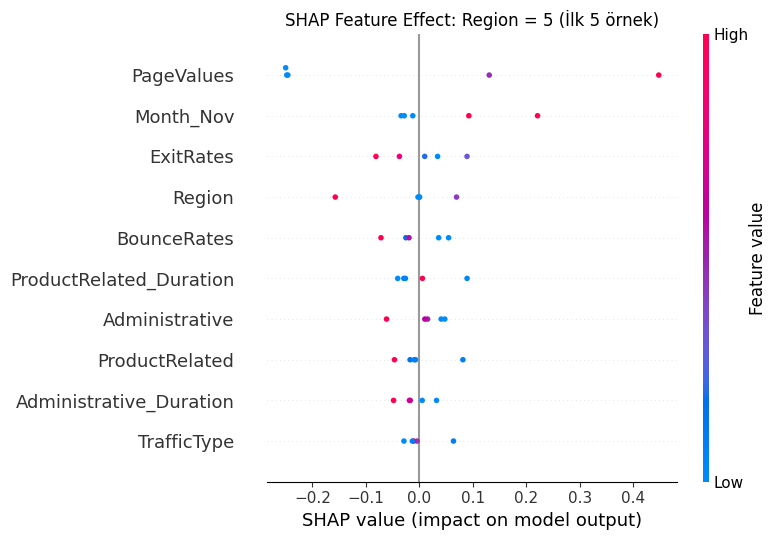

✅ SHAP is drawing: Region = 6 (5 örnek)


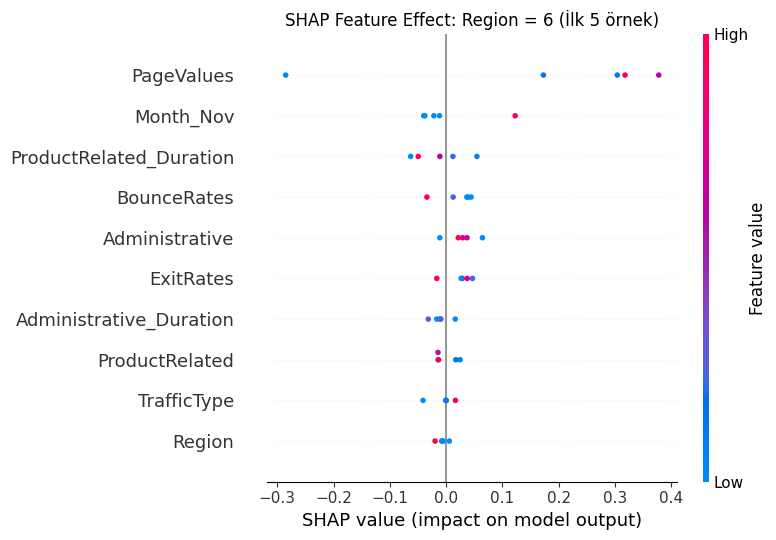

✅ SHAP is drawing: Region = 7 (5 örnek)


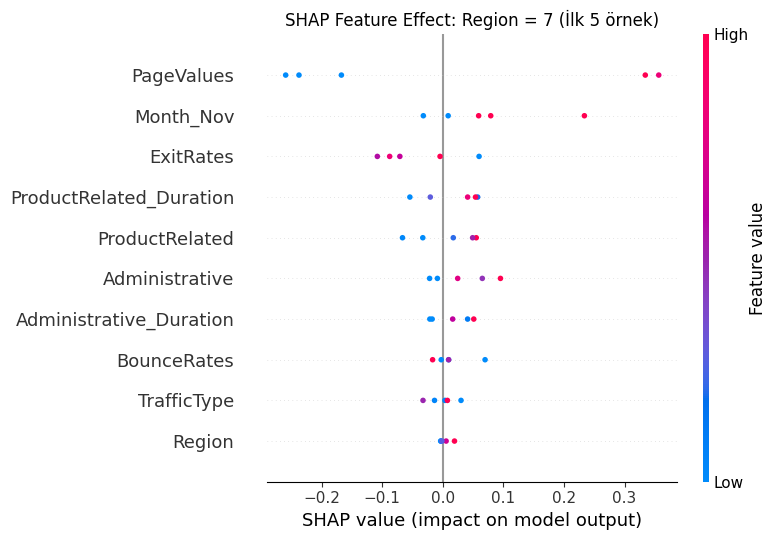

✅ SHAP is drawing: Region = 8 (5 örnek)


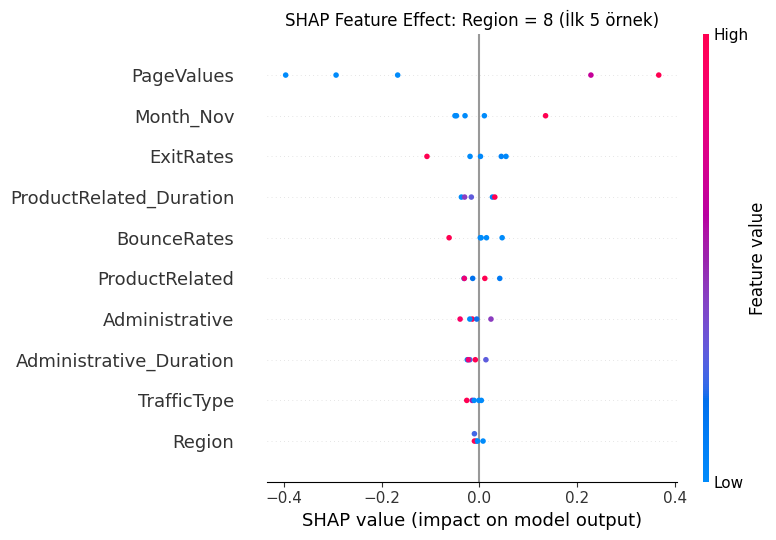

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

subgroup_columns = ['Month_Nov', 'TrafficType', 'Region']

X_test_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)
X_test_with_groups = X_test_df.copy()

balanced_data = balanced_data.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_test_df = X_test_df.reset_index(drop=True)
X_test_with_groups = X_test_with_groups.reset_index(drop=True)

for col in subgroup_columns:
    X_test_with_groups[col] = balanced_data.loc[y_test.index, col].values

explainer = shap.TreeExplainer(best_rf_model)

for subgroup_col in subgroup_columns:
    print(f"\n========== Subgroup: {subgroup_col} ==========")
    unique_groups = X_test_with_groups[subgroup_col].unique()

    for group in unique_groups:
        group_mask = X_test_with_groups[subgroup_col] == group
        X_group_full = X_test_df[group_mask]

        if len(X_group_full) < 5:
            print(f"⏭️ {group} group too small, SHAP not calculated ({len(X_group_full)} example)")
            continue

        X_group = X_group_full.iloc[:5]

        shap_values_group = explainer.shap_values(X_group)

        if isinstance(shap_values_group, list):
            shap_values = shap_values_group[1]
        else:
            shap_values = shap_values_group[:, :, 1]

        if shap_values.shape != X_group.shape:
            print(f"❌ MISMATCH: SHAP {shap_values.shape}, X_group {X_group.shape}")
            continue

        print(f"✅ SHAP is drawing: {subgroup_col} = {group} ({len(X_group)} örnek)")
        shap.summary_plot(shap_values, X_group, max_display=10, show=False)
        plt.title(f"SHAP Feature Effect: {subgroup_col} = {group} (İlk 5 örnek)")
        plt.tight_layout()
        plt.show()
